In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import constants, os, math
import Plotting as pl

In [2]:
hcdf=pl.boxplotDF(pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, constants.species, singleDf=True),
                  constants.species, constants.physical, constants.HOTCORE)
shdf=pl.boxplotDF(pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, constants.species, singleDf=True),
                  constants.species, constants.physical, constants.SHOCK)

In [3]:
dfDic={constants.HOTCORE: hcdf, constants.SHOCK: shdf}

In [4]:
for enfasis in [constants.COSMICRAY, constants.INTERSTELLARRAD]:
    fig, axs = plt.subplots(1,2, figsize=(15,10), layout='tight', sharey=True)
    for i, tipo in enumerate(dfDic.keys()):
        sns.boxplot(data=dfDic[tipo], x=enfasis,
                    hue=enfasis, legend=None, palette='hls',
                    y='N_CH3OH', ax=axs[i], log_scale=True)
        axs[i].set_title(tipo.upper())
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{enfasis.upper()}.png")
    plt.close()

In [5]:
for tipo in dfDic.keys():
    fig, axs = plt.subplots(1,2, figsize=(15,10), layout='tight', sharey=True)
    df=dfDic[tipo]
    varparam=constants.FTEMP if tipo==constants.HOTCORE else constants.SHOCKVEL
    for i, enfasis in enumerate([constants.IDENS, varparam]):
        sns.boxplot(data=df, x=enfasis,
                    hue=enfasis, legend=None, palette='hls',
                    y='N_CH3OH', ax=axs[i], log_scale=True)
        axs[i].set_title(tipo.upper())
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{enfasis.upper()}.png")
    plt.close()

# misc

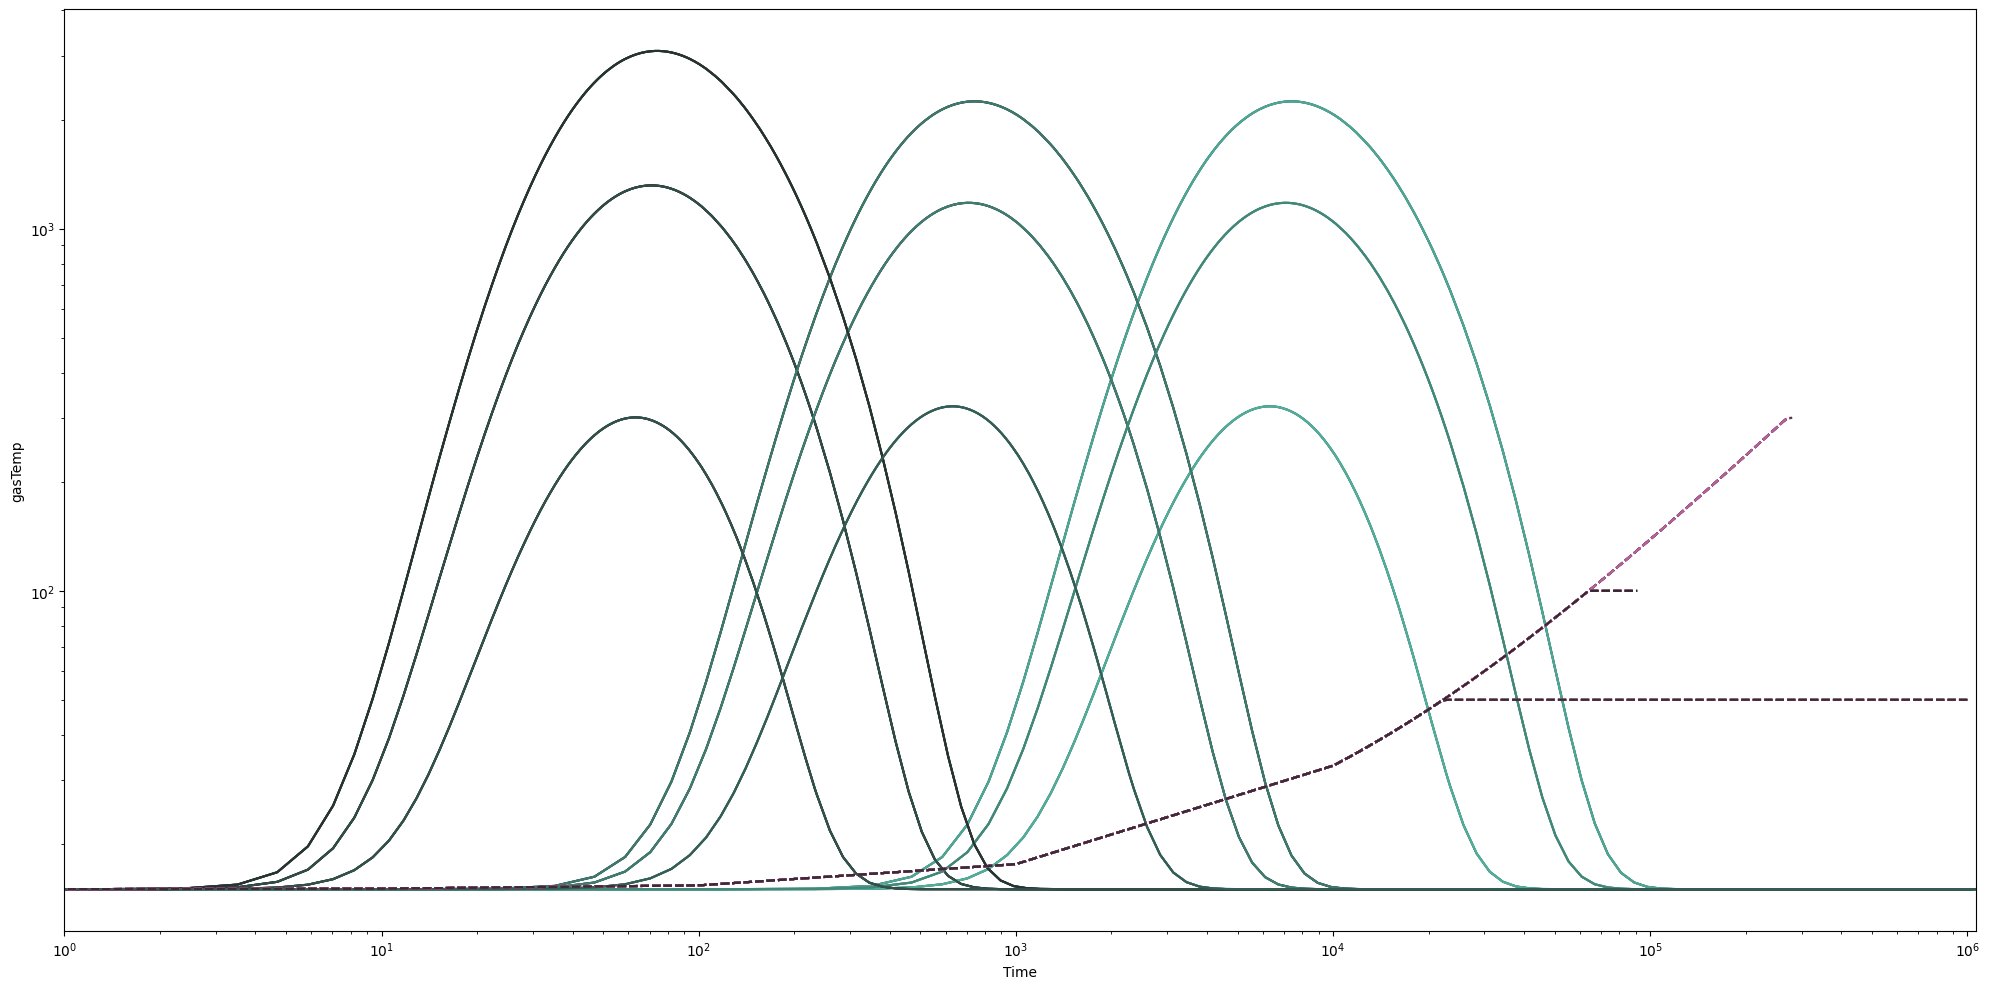

In [50]:
fig, ax = plt.subplots(figsize=(20,10), layout='tight')
sns.boxplot(data=la_df, x='Time', y='gasTemp',
            hue='runName', style='tipo',
            palette=colorDict, legend=None,
            ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xbound(1,la_df['Time'].max())

Text(0.5, 0.98, 'CH3OH Abundance - Time Evolution Comparison \niDens')

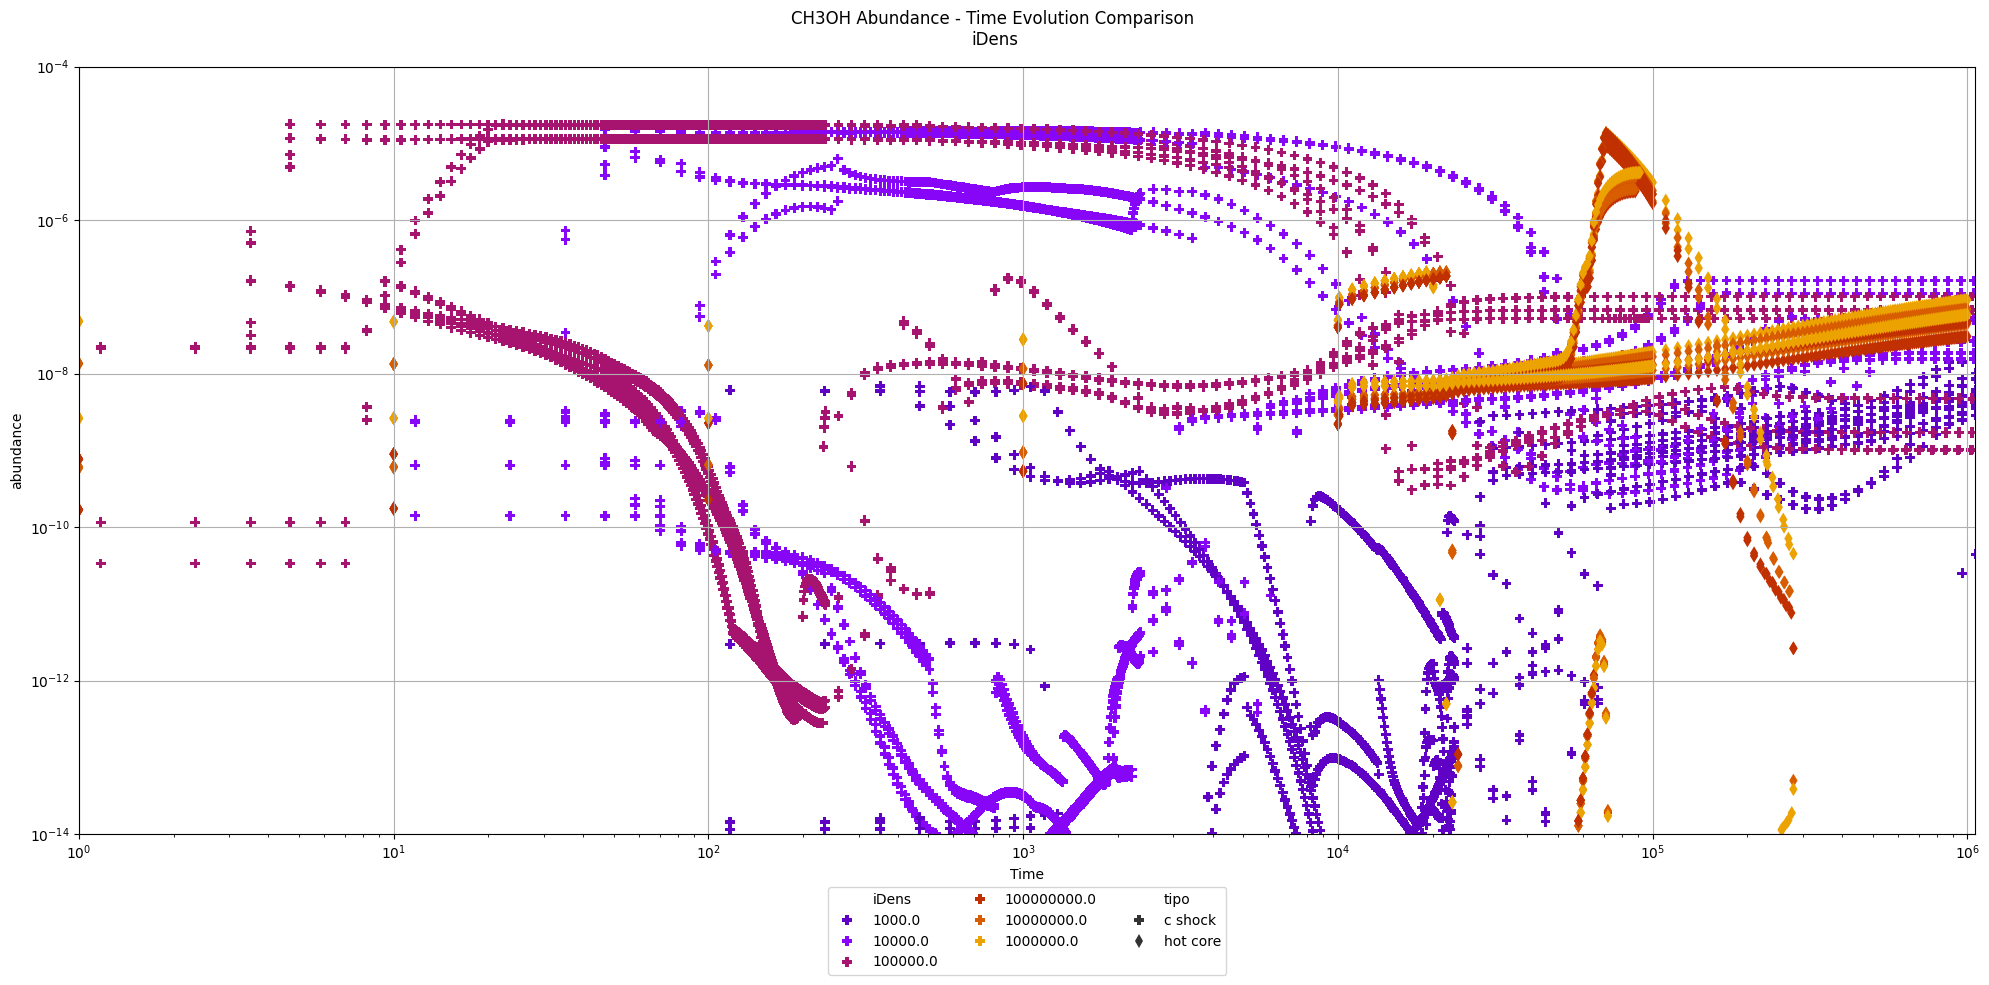

In [6]:
hue=constants.IDENS

fig, ax = plt.subplots(figsize=(20,10), layout='tight')
ax.grid(True)  
# sns.lineplot(data=df, x='Time', y='abundance',
sns.scatterplot(data=la_df, x='Time', y='abundance',
            hue=hue, style='tipo',
            palette='gnuplot',
            linewidth=0, s=50, markers={constants.HOTCORE: "d", constants.SHOCK: "P"},
            # errorbar=lambda x: (x.min(), x.max()),
            ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xbound(1,la_df['Time'].max())
ax.set_ybound(1e-14,1e-4)
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.06), ncol=3 if hue==constants.IDENS else 2)
fig.suptitle('CH3OH Abundance - Time Evolution Comparison \n'+' | '.join([hue]))
# if saveFig: fig.savefig(figName, dpi=300, bbox_inches='tight')